In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


In [63]:
df_res_gridsearch=pd.read_csv("train_test/CH/models_full_gridsearch.csv")

In [71]:
n_res=108
# best
best_C=df_res_gridsearch[df_res_gridsearch["rank_test_score"]==1]["param_C"].values[0]

df_sub_res_gridsearch=df_res_gridsearch[(df_res_gridsearch["param_C"]==best_C) & (df_res_gridsearch["n_resources"]==n_res)]

In [72]:
# minus
loss=-df_sub_res_gridsearch["mean_test_score"]

gammas=df_sub_res_gridsearch["param_gamma"]

In [73]:
idx=np.argsort(gammas)
gammas_sorted=gammas.values[idx]
loss_sorted=loss.values[idx]

In [74]:
gammas_sorted

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

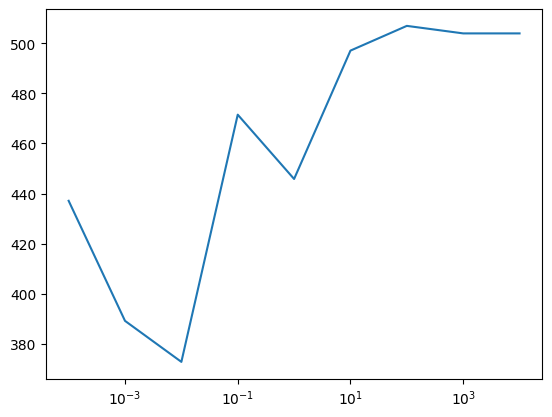

In [75]:
plt.plot(gammas_sorted, loss_sorted)
plt.xscale('log')
plt.show()

In [109]:
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis', ax=ax)
plt.show()

In [114]:
resource_levels

array([ 108,  324,  972, 2916, 8748])

/var/folders/wk/w3jwly1571s0xs7pts6rx26r0000gn/T/ipykernel_10220/1723782824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['mean_test_score'] = -results['mean_test_score']


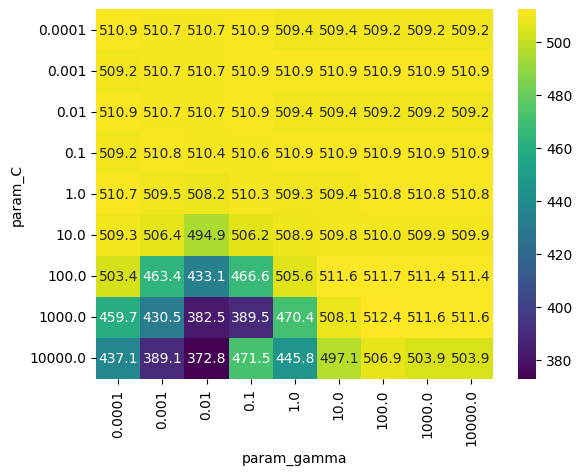

In [139]:
results = df_res_gridsearch[['param_C', 'param_gamma', 'mean_test_score', 'n_resources']]
results['mean_test_score'] = -results['mean_test_score']
results

n_res=108

subset = results[results['n_resources'] == n_res]
pivot_table = subset.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

sns.heatmap(pivot_table, annot=True, fmt=".01f", cmap='viridis')


plt.show()

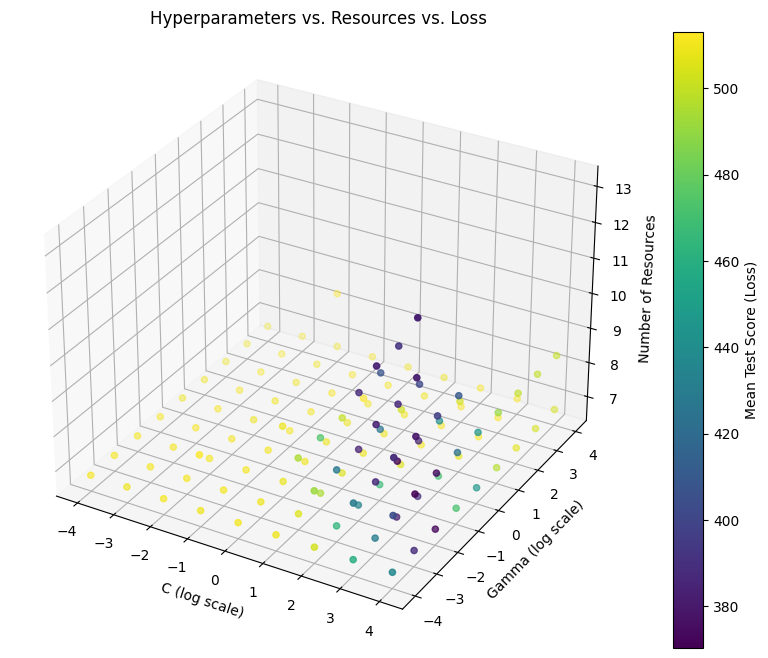

In [94]:


from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot
C_values = results['param_C']
gamma_values = results['param_gamma']
n_resources = results['n_resources']
mean_test_scores = results['mean_test_score']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
sc = ax.scatter(np.log10(C_values), np.log10(gamma_values), np.log2(n_resources), c=mean_test_scores, cmap='viridis')

ax.set_xlabel('C (log scale)')
ax.set_ylabel('Gamma (log scale)')
ax.set_zlabel('Number of Resources')
ax.set_title('Hyperparameters vs. Resources vs. Loss')

# Add color bar to show the loss values
cbar = plt.colorbar(sc)
cbar.set_label('Mean Test Score (Loss)')

plt.show()

In [4]:
# difference gaussian_rbf and linear DE
df_rbf=pd.read_csv("Data/SECURES-Met/DE/clean/model_prediction_gaussian_rbf.csv")

df_linear=pd.read_csv("Data/SECURES-Met/DE/clean/model_prediction_linear.csv")

In [6]:
df_rbf

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,42297.142202,45746.218502,48749.916024,51961.177149,55138.501716,58468.315188,61264.859090,64429.375490,69449.460961
1,42297.166549,45746.253720,48749.968855,51961.215759,55138.502598,58468.318964,61264.916522,64429.507707,69449.591083
2,42297.189158,45746.286422,48750.017913,51961.251612,55138.503417,58468.322471,61264.969851,64429.630477,69449.711909
3,42297.210027,45746.316609,48750.063197,51961.284707,55138.504173,58468.325710,61265.019078,64429.743802,69449.823438
4,42297.227418,45746.341765,48750.100933,51961.312285,55138.504804,58468.328408,61265.060101,64429.838239,69449.916378
...,...,...,...,...,...,...,...,...,...
8755,42283.000558,45720.810395,48719.799139,51930.064290,55111.090101,58444.107016,61244.028975,64410.694147,69424.685373
8756,42283.040640,45720.868391,48719.886124,51930.127897,55111.091662,58444.113328,61244.123478,64410.911614,69424.899427
8757,42283.291146,45721.264668,48720.368635,51930.573478,55111.445042,58444.466842,61244.568409,64411.452513,69425.343482
8758,42283.338202,45721.332756,48720.470754,51930.648153,55111.446884,58444.474262,61244.679351,64411.707790,69425.594753


In [3]:
df_linear

NameError: name 'df_linear' is not defined

In [7]:
df_a_laplacian_gridsearch=pd.read_csv("train_test/SECURES-Met/DE/a_laplacian/models_a_laplacian_gridsearch.csv")
df_a_laplacian_gridsearch[df_a_laplacian_gridsearch["rank_test_score"]==1]

df_a_polynomial_gridsearch=pd.read_csv("train_test/SECURES-Met/DE/polynomial/models_polynomial_gridsearch.csv")
df_a_polynomial_gridsearch[df_a_polynomial_gridsearch["rank_test_score"]==1]


# df_linear_gridsearch=pd.read_csv("train_test/SECURES-Met/CH/linear/models_linear_gridsearch.csv")
# df_linear_gridsearch[df_linear_gridsearch["rank_test_score"]==1]

# df_gaussian_rbf_gridsearch=pd.read_csv("train_test/SECURES-Met/CH/gaussian_rbf/models_gaussian_rbf_gridsearch.csv")
# df_gaussian_rbf_gridsearch[df_gaussian_rbf_gridsearch["rank_test_score"]==1]

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_d,param_gamma,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,1,8784,624.242509,81.467776,0.038254,0.005261,2,3,"{'d': 2, 'gamma': 3}",-4813.834713,...,-4233.444289,457.149304,1,-3401.879945,-3614.947326,-3639.933228,-3565.179454,-3380.29259,-3520.446508,108.544616


In [61]:
results = df_a_laplacian_gridsearch[['param_C', 'param_gamma', 'mean_test_score', 'n_resources']]
results['mean_test_score'] = -results['mean_test_score']
results

n_res=10

subset = results[results['n_resources'] == n_res]
pivot_table = subset.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

sns.heatmap(pivot_table, annot=True, fmt="0.1f", cmap='viridis')


plt.show()

/var/folders/wk/w3jwly1571s0xs7pts6rx26r0000gn/T/ipykernel_68122/500156387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['mean_test_score'] = -results['mean_test_score']


ValueError: zero-size array to reduction operation fmin which has no identity